# Project Summary

**I will create and demonstrate a K-Means clustering algorithm in this jupyter-notebook. In general, clustering is classified as an unsupervised machine learning approach that enable us to cluster data and find the data pattern. In addition, K-means is one of the most common techniques of clustering. In the last part of this project, I will include K-means implementation from scikit-learn package.**

**Project Steps:** 

1. Scale datasets to standardize values.
2. Identify the number of clusters (usually referred to as k).
3. Initialize the random centroid for each cluster. (The centroid = the center of the cluster)
4. Determine data labels by searching for the closest centroid to each data point.
5. Update the centroids based on the geometric mean of all the data points in the cluster.
6. Iterate 4 - 5 until the centroids stop changing.

# Import the required package 

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Load the FIFA dataset

In [2]:
players = pd.read_csv("players_22.csv")

In [3]:
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


# Feature selection (only continuous variables)

In [4]:
# Feature selection (only continuous variables)
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [5]:
# Drop null values since k-means can't deal with null values
players = players.dropna(subset=features)

In [6]:
data = players[features].copy()

In [7]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


# K-Means From Scratch

1. Scale datasets to standardize values.
2. Identify the number of clusters (usually referred to as k).
3. Initialize the random centroid for each cluster. (The centroid = the center of the cluster)
4. Determine data labels by searching for the closest centroid to each data point.
5. Update the centroids based on the geometric mean of all the data points in the cluster.
6. Plot the centroids
6. Iterate 4 - 6 until the centroids stop changing.

## Min-Max Scaler

In [8]:
# Scale the data range into [1, 11]
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1

In [9]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,5.078302,5.799998,1.243826,1.146473,4.403716
std,1.496262,1.323418,0.557253,0.392477,1.750932
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.043478,4.913043,1.014306,1.024022,2.851852
50%,5.130435,5.782609,1.071531,1.049796,4.333333
75%,6.000000,6.652174,1.214592,1.102634,5.814815
max,11.000000,11.000000,11.000000,11.000000,11.000000


## Initialize random centroids

In [10]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        # randomly select one data point for each column/feature
        centroid = data.apply(lambda x: float(x.sample()))
        # append the centroid for each iteration
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [11]:
centroids = random_centroids(data, 5)

In [12]:
centroids

,0,1,2,3,4
overall,5.347826,1.000000,5.130435,4.478261,6.000000
potential,6.217391,5.130435,5.565217,4.695652,6.000000
wage_eur,1.042918,1.586552,1.472103,2.416309,1.643777
value_eur,1.087169,1.154182,1.061395,1.154182,1.097479
age,6.185185,2.111111,2.851852,4.333333,2.851852


## Determine the data labels

In [13]:
np.random.seed(100)
def get_labels(data, centroids):
    # calculate the difference between each row of data point to all centroids using Euclidean distance
    # apply(lambda x) --> x means each columns in the centroids (from column 0 to column 4)
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    # return the data label responding to the smallest distance
    return distances.idxmin(axis=1)

In [14]:
labels = get_labels(data, centroids)

In [15]:
# Display the distribution of data labels
labels.value_counts()

0    6430
2    4891
4    3549
3    2762
1    1533
dtype: int64

## Update the new data label

- https://www.wikihow.com/Calculate-the-Geometric-Mean#:~:text=Divide%20the%20sum%20of%20the,value%20of%20the%20geometric%20mean.

In [16]:
def new_centroids(data, labels, k):
    # For each data label, caculate the geometric mean
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

## PCA

In [18]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()
    time.sleep(.5)

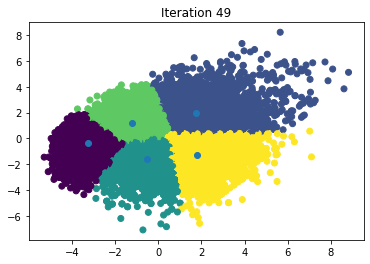

In [19]:
max_iterations = 50
centroid_count = 5

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

# Time to Jump out of the loop
# Hit the max_iteration or centroids stop changing
while iteration <= max_iterations and not centroids.equals(old_centroids):
    iteration += 1
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)

In [20]:
centroids

,0,1,2,3,4
overall,2.655591,7.087006,4.342939,4.687580,5.784265
potential,4.829940,7.440482,4.348967,6.451950,5.388402
wage_eur,1.017458,1.754570,1.049986,1.081908,1.196929
value_eur,1.014915,1.501526,1.029910,1.070178,1.068671
age,2.404790,4.356059,4.871502,2.837969,6.478395


In [21]:
labels.value_counts()

3    5074
4    4635
2    3707
1    3210
0    2539
dtype: int64

In [22]:
# Through the centroids table, we can easily identify the data pattern
# Ex. Label 2: Most of the players have highest value across all the features
players[labels == 2][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
5063,Vítor Angulho,70,70,6000.0,1300000.0,25
5065,Renatão Baumer,70,70,12000.0,1600000.0,25
5066,Carvamelinho,70,70,13000.0,1600000.0,25
5068,Claytinho Branco,70,70,13000.0,1600000.0,25
5070,Breno Bemposta,70,70,7000.0,1600000.0,25
...,...,...,...,...,...,...
19012,A. Paul,50,55,500.0,50000.0,26
19032,Song Yue,50,50,2000.0,40000.0,29
19100,J. Russell,49,49,500.0,15000.0,36
19118,Gao Xiang,49,49,2000.0,35000.0,32


# K-Means from scikit-learn package

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(5)
kmeans.fit(data)

KMeans(n_clusters=5)

In [24]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2,3,4
overall,4.577694,5.364305,3.198475,7.773812,6.184068
potential,4.401498,6.663011,5.274451,7.996917,5.783429
wage_eur,1.057060,1.164570,1.023541,2.428675,1.299732
value_eur,1.030554,1.106070,1.021244,2.015038,1.096755
age,5.439824,3.364050,2.605085,4.708911,6.625000
